## 은행에서 예금을 수신하기 위한 데이터 기반 상품홍보 전략 수집

- data_train : 주어진 데이터
- data_test : 이 데이터의 y값과 data_train에서 예측한 yhat의 값을 비교해 total_score 결정
- test : data_test에서 y값을 뺀 것으로, data_train에서 학습한 모델을 이 데이터에 적용해 y값을 도출 
- submission : test에서의 y값을 여기에 넣어서 최종 결과 산출
<br>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
train_df = pd.read_csv("data_train.csv")
train_df.head(20)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,25733,40,blue-collar,married,basic.6y,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,yes
1,30019,30,unemployed,single,university.degree,no,yes,no,cellular,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,yes
2,36810,36,self-employed,single,university.degree,no,no,no,cellular,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,yes
3,40303,34,admin.,married,university.degree,no,yes,no,cellular,jul,thu,1,6,3,success,-1.7,94.215,-40.3,yes
4,20334,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,yes
5,40230,45,management,married,university.degree,no,yes,no,cellular,jul,thu,2,6,2,success,-1.7,94.215,-40.3,yes
6,40653,42,admin.,single,high.school,no,no,no,cellular,sep,wed,1,14,1,success,-1.1,94.199,-37.5,yes
7,37997,49,admin.,married,high.school,no,no,no,cellular,sep,tue,1,3,1,success,-3.4,92.379,-29.8,yes
8,37580,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,2,999,1,failure,-2.9,92.201,-31.4,yes
9,8822,46,blue-collar,married,professional.course,no,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,yes


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4000 non-null   int64  
 1   age             4000 non-null   int64  
 2   job             4000 non-null   object 
 3   marital         4000 non-null   object 
 4   education       4000 non-null   object 
 5   default         4000 non-null   object 
 6   housing         4000 non-null   object 
 7   loan            4000 non-null   object 
 8   contact         4000 non-null   object 
 9   month           4000 non-null   object 
 10  day_of_week     4000 non-null   object 
 11  campaign        4000 non-null   int64  
 12  pdays           4000 non-null   int64  
 13  previous        4000 non-null   int64  
 14  poutcome        4000 non-null   object 
 15  emp.var.rate    4000 non-null   float64
 16  cons.price.idx  4000 non-null   float64
 17  cons.conf.idx   4000 non-null   f

In [4]:
train_df.describe()

,Unnamed: 0,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,22027.638250,40.032250,2.549750,932.226750,0.219500,-0.142400,93.538946,-40.438675
std,12349.081195,11.099843,2.877776,248.711889,0.570001,1.664192,0.605973,4.930643
min,7.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000
25%,11388.500000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000
50%,22391.500000,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000
75%,33164.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000
max,41185.000000,92.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000


In [5]:
train_df = train_df.drop(['Unnamed: 0'], axis=1)
train_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,40,blue-collar,married,basic.6y,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,yes
1,30,unemployed,single,university.degree,no,yes,no,cellular,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,yes
2,36,self-employed,single,university.degree,no,no,no,cellular,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,yes
3,34,admin.,married,university.degree,no,yes,no,cellular,jul,thu,1,6,3,success,-1.7,94.215,-40.3,yes
4,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,blue-collar,married,basic.4y,unknown,no,no,cellular,jul,mon,5,999,0,nonexistent,1.4,93.918,-42.7,no
3996,32,services,single,professional.course,no,yes,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,no
3997,24,admin.,single,high.school,no,no,no,telephone,jul,wed,6,999,0,nonexistent,1.4,93.918,-42.7,no
3998,28,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,no


# EDA

no     3000
yes    1000
Name: y, dtype: int64


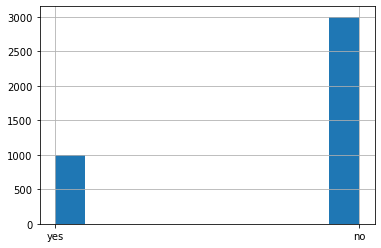

In [6]:
train_df['y'].hist()
print(train_df['y'].value_counts())

-> **Class Imbalance가 심함**

<AxesSubplot:xlabel='housing', ylabel='count'>

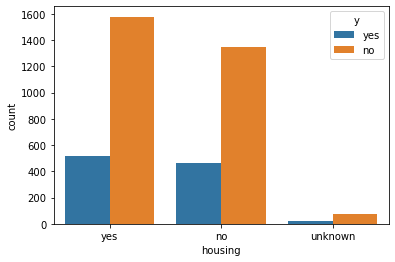

In [7]:
sns.countplot(x='housing', data=train_df, hue='y')

-> housing 변수가 yes, no housing, unknown일 때 모두 y가 no인 경우가 더 많음 

<AxesSubplot:xlabel='y', ylabel='age'>

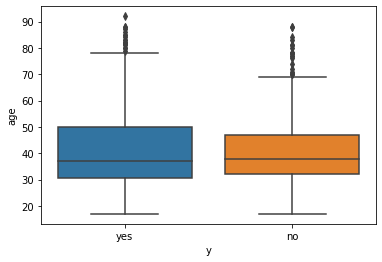

In [8]:
sns.boxplot(x='y', y='age', data=train_df)

예금을 예치한 경우와 그렇지 않은 경우 모두 평균연령이 30대 후반 정도인 것을 알 수 있음
<br>따라서 y 분류에 큰 영향을 줄 것 같지는 않다고 판단

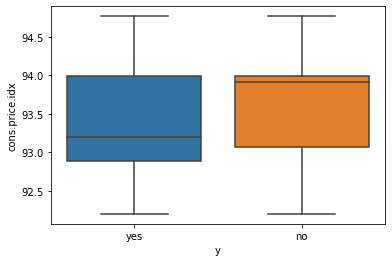

In [9]:
sns.boxplot(x='y', y='cons.price.idx', data=train_df)
plt.show()

-> 소비자 물가지수에 따른 y의 분포의 차이가 확실히 있음을 확인 가능

<AxesSubplot:xlabel='loan', ylabel='count'>

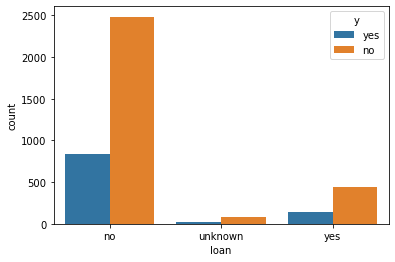

In [10]:
sns.countplot(x='loan', data=train_df, hue='y')

-> loan이 no일 때와 yes일 때 모두 예금을 예치 안한 경우(y='no')가 예치한 경우(y='yes')보다 많음

<AxesSubplot:xlabel='contact', ylabel='count'>

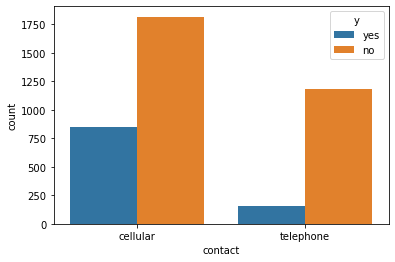

In [11]:
sns.countplot(x='contact', data=train_df, hue='y')

-> telemarketing수단인 contact이 celluar일 때와 telephone일 때 모두 예치를 안한 경우가 한 경우보다 많음

<AxesSubplot:xlabel='poutcome', ylabel='count'>

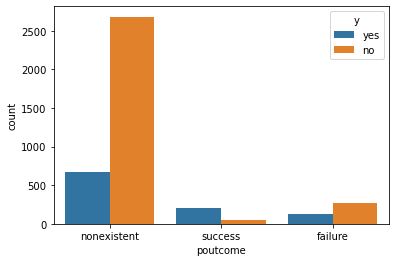

In [12]:
sns.countplot(x='poutcome', data=train_df, hue='y')

-> nonexistent로 보아 이전의 마케팅에 참여한 적이 없는 새로운 신규 고객들이 대다수인 것을 알 수 있음

<AxesSubplot:xlabel='month', ylabel='count'>

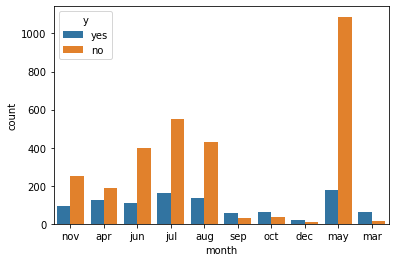

In [13]:
sns.countplot(x='month', data=train_df, hue='y')

-> 마지막으로 진행한 contact의 월이 5,6,7,8월에 집중적으로 많은 것으로 보아 이때 가입자 수가 많은 것을 확인 할 수 있음

<AxesSubplot:xlabel='marital', ylabel='count'>

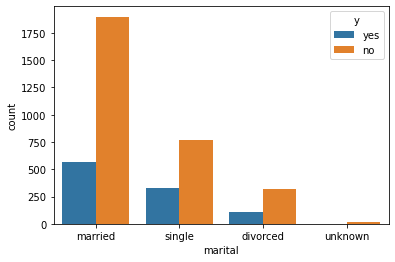

In [14]:
sns.countplot(x='marital', data=train_df, hue='y')

-> 결혼 상태에 따라 married(기혼), single(미혼), divorced(이혼)의 순으로 예금 예치 여부가 차이나는 것을 확인할 수 있음 

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

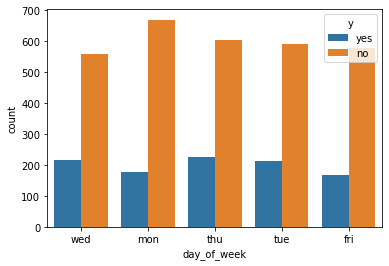

In [15]:
sns.countplot(x='day_of_week',data=train_df, hue='y')

-> 특정 요일에 편향이 안되어있고 고르게 y분포가 형성되어 있는 것을 보아 y 분류에 영향을 크게 안미칠 것이라판단

<AxesSubplot:xlabel='age', ylabel='count'>

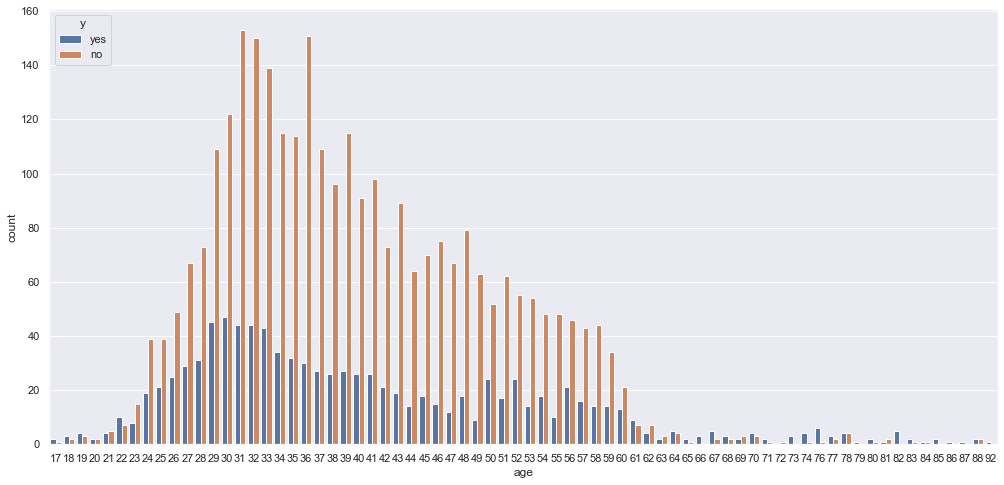

In [16]:
sns.set(rc={'figure.figsize':(17,8)})
sns.countplot(data=train_df, x='age', hue='y')

age(나이)가 많을 수록 예금을 안한 사람이 적음을 알 수 있음

In [17]:
bins = [10,20,30,40,50,60,70,80,90,100]
labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']

# eda를 위해 임의로 train data copy본 생성
for_age = train_df.copy()
for_age['agegroup'] = pd.cut(for_age['age'],bins, labels)
for_age = (for_age['y']=='yes').groupby(for_age['agegroup']).agg(lambda x: x.sum() / len(x)).reset_index(name='yes_percent')

<AxesSubplot:xlabel='agegroup', ylabel='yes_percent'>

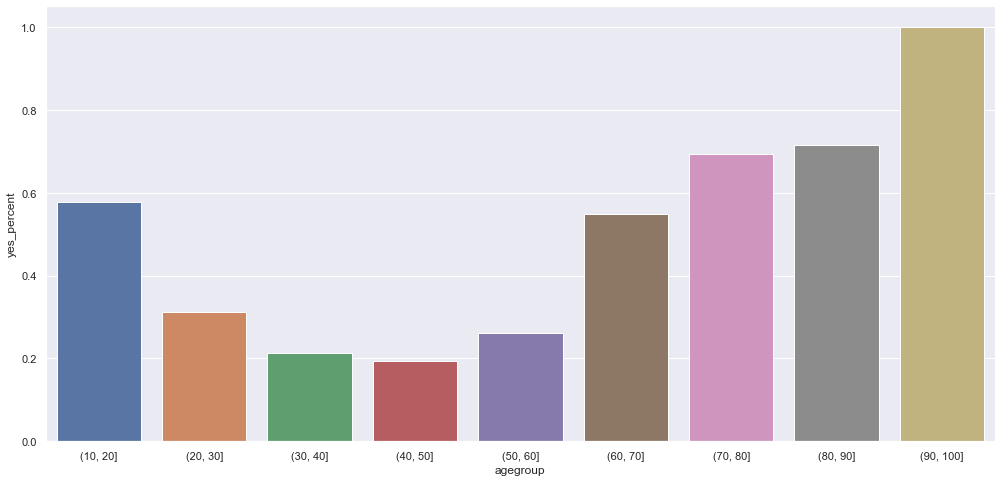

In [18]:
sns.barplot(x='agegroup', y='yes_percent', data=for_age)

age를 10단위 그룹별로 봤을 때 20~50대는 y가 no인 경우,즉 예금을 예치하지 않은 경우가 많은 반면 60대 이후부터는 y=yes의 퍼센트가 높은 것을 확인 가능

# 전처리

### 결측치 판단

In [19]:
train_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

<AxesSubplot:>

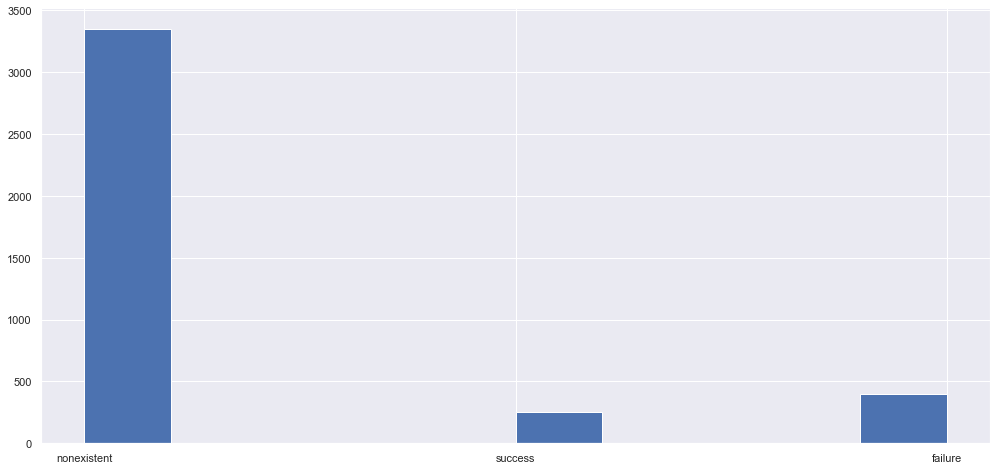

In [20]:
train_df["poutcome"].hist()

null 값은 없지만 데이터에 unknown, nonexistent 값이 존재

-> unknown 값을 결측치로 판단

-> 그러나 poutcome 값은 nonexistent가 대다수이기 때문에 결측값으로 판단하지 않음

In [21]:
train_df = train_df.applymap(lambda x: np.nan if x=='unknown' else x)
train_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,40,blue-collar,married,basic.6y,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,yes
1,30,unemployed,single,university.degree,no,yes,no,cellular,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,yes
2,36,self-employed,single,university.degree,no,no,no,cellular,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,yes
3,34,admin.,married,university.degree,no,yes,no,cellular,jul,thu,1,6,3,success,-1.7,94.215,-40.3,yes
4,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,blue-collar,married,basic.4y,NaN,no,no,cellular,jul,mon,5,999,0,nonexistent,1.4,93.918,-42.7,no
3996,32,services,single,professional.course,no,yes,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,no
3997,24,admin.,single,high.school,no,no,no,telephone,jul,wed,6,999,0,nonexistent,1.4,93.918,-42.7,no
3998,28,blue-collar,married,basic.9y,NaN,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,no


### 문제의 목적에 맞는 Custom Scoring 함수 생성

In [22]:
def mean_custom_scoring(y_test, y_pred):
    yes_defer_score = sum(((y_test!=y_pred) & (y_test==1)))*(-3)
    no_try_score = sum(((y_test!=y_pred) & (y_test==0)))*(-2)
    yes_try_score = sum(((y_test==y_pred) & (y_test==1)))*(+5)
    no_defer_score = sum(((y_test==y_pred) & (y_test==0)))*0
    
    total_score = yes_defer_score+no_try_score+yes_try_score+no_defer_score
    
    return total_score/len(y_test)

# 모델 학습

# 1. Logistic Regression

In [23]:
# 범주형 변수들
cat_col = ['job','marital','education','default', 'housing', 'loan', 'contact', 'month',
             'day_of_week','poutcome', 'y']

In [24]:
# 1. dummy로 처리할 범주형 변수 처리 
cat_dummy = ['job', 'marital','education','month','day_of_week', 'housing', 'loan', 'default', 'contact','poutcome']
# 2. 값만 변환할 범주형 변수
cat_value = ['y' ]
data_dummy = pd.get_dummies(train_df.loc[:,cat_dummy],columns=cat_dummy, drop_first=True)
y_map = {'yes':1, 'no':0}

In [25]:
train_for_lc = train_df.copy()
train_for_lc = train_for_lc.drop(columns = cat_col)
train_for_lc['y'] = train_df['y'].apply(lambda x : y_map[x])
train_for_lc = pd.concat([train_for_lc,data_dummy], axis=1)
train_for_lc

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,...,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,40,1,999,0,-0.1,93.200,-42.0,1,1,0,...,0,0,0,0,1,1,0,0,1,0
1,30,1,999,0,-1.8,93.075,-47.1,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,36,1,999,0,-2.9,92.963,-40.8,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,34,1,6,3,-1.7,94.215,-40.3,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,38,1,999,0,1.4,93.444,-36.1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,5,999,0,1.4,93.918,-42.7,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3996,32,1,999,0,1.1,93.994,-36.4,0,0,0,...,0,0,1,0,0,1,0,1,1,0
3997,24,6,999,0,1.4,93.918,-42.7,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3998,28,1,999,0,1.1,93.994,-36.4,0,1,0,...,0,0,1,0,0,0,0,1,1,0


- 새롭게 정의된 비용함수(mean_custom_scoring)가 최적화되도록 지정
- Class imbalance할 때 class에 따른 가중치 부여
    - Class weight 도 parameter로 지정

In [26]:
X = train_for_lc.drop('y', axis=1)
y = train_for_lc['y']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [28]:
from sklearn.preprocessing import StandardScaler  
  
scaler = StandardScaler()  
  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [29]:
weights = np.linspace(0.0,0.99,10)

In [30]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

params = {
    "penalty" : ["l2", "l1"],
    "C" : [0.01, 0.1, 1, 5, 10],
    "class_weight": [{0:x, 1:1.0-x} for x in weights]
}

lr = LogisticRegression(random_state = 0)
grid_cv_lr = GridSearchCV(lr, param_grid=params, cv=5, n_jobs=-1, scoring=make_scorer(mean_custom_scoring))
grid_cv_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10],
                         'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.11, 1: 0.89},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.33, 1: 0.6699999999999999},
                                          {0: 0.44, 1: 0.56},
                                          {0: 0.55, 1: 0.44999999999999996},
                                          {0: 0.66, 1: 0.33999999999999997},
                                          {0: 0.77, 1: 0.22999999999999998},
                                          {0: 0.88, 1: 0.12},
                                          {0: 0.99, 1: 0.010000000000000009}],
                         'penalty': ['l2', 'l1']},
             scoring=make_scorer(mean_custom_scoring))

In [31]:
print('최적 하이퍼 파라미터: ', grid_cv_lr.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_lr.best_score_))

최적 하이퍼 파라미터:  {'C': 1, 'class_weight': {0: 0.22, 1: 0.78}, 'penalty': 'l2'}
최고 예측 정확도: 0.2894


In [32]:
lr_pred = grid_cv_lr.predict(X_test)

In [33]:
print(mean_custom_scoring(y_test, lr_pred))

0.335


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, lr_pred))

accuracy = accuracy_score(y_test, lr_pred)
print("정확도:", accuracy)

precision = precision_score(y_test, lr_pred)
print("정밀도:", precision) 

recall = recall_score(y_test, lr_pred)
print("재현율:", recall) 

f1 = f1_score(y_test, lr_pred)
print("f1 점수:", f1)

[[478 122]
 [ 61 139]]
정확도: 0.77125
정밀도: 0.5325670498084292
재현율: 0.695
f1 점수: 0.6030368763557484


# 2. Random Forest

## 결정트리 모델에 넣기 위한 변수 정제작업
### 변수 인코딩

1. 이진 변수 더미화
2. Ordinal Encoding

In [35]:
# 이진 변수 찾기
train_df.nunique()

age               72
job               11
marital            3
education          7
default            1
housing            2
loan               2
contact            2
month             10
day_of_week        5
campaign          32
pdays             20
previous           7
poutcome           3
emp.var.rate      10
cons.price.idx    26
cons.conf.idx     26
y                  2
dtype: int64

-> 이진변수 : housing, loan, contact, y

In [36]:
# 이진 변수 처리
train2_df = pd.get_dummies(train_df, columns = ['housing', 'loan', 'contact', 'y'], drop_first=True)
train2_df

,age,job,marital,education,default,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,housing_yes,loan_yes,contact_telephone,y_yes
0,40,blue-collar,married,basic.6y,no,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,1,0,0,1
1,30,unemployed,single,university.degree,no,apr,wed,1,999,0,nonexistent,-1.8,93.075,-47.1,1,0,0,1
2,36,self-employed,single,university.degree,no,jun,mon,1,999,0,nonexistent,-2.9,92.963,-40.8,0,0,0,1
3,34,admin.,married,university.degree,no,jul,thu,1,6,3,success,-1.7,94.215,-40.3,1,0,0,1
4,38,technician,married,professional.course,no,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,blue-collar,married,basic.4y,NaN,jul,mon,5,999,0,nonexistent,1.4,93.918,-42.7,0,0,0,0
3996,32,services,single,professional.course,no,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,1,0,1,0
3997,24,admin.,single,high.school,no,jul,wed,6,999,0,nonexistent,1.4,93.918,-42.7,0,0,1,0
3998,28,blue-collar,married,basic.9y,NaN,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,0,0,1,0


In [37]:
# default의 값은 unknown(null)값을 제외하면 모두 no -> 0으로 변환
train2_df['default'] = train2_df['default'].replace('no', 0)

In [38]:
train2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4000 non-null   int64  
 1   job                3966 non-null   object 
 2   marital            3986 non-null   object 
 3   education          3842 non-null   object 
 4   default            3260 non-null   float64
 5   month              4000 non-null   object 
 6   day_of_week        4000 non-null   object 
 7   campaign           4000 non-null   int64  
 8   pdays              4000 non-null   int64  
 9   previous           4000 non-null   int64  
 10  poutcome           4000 non-null   object 
 11  emp.var.rate       4000 non-null   float64
 12  cons.price.idx     4000 non-null   float64
 13  cons.conf.idx      4000 non-null   float64
 14  housing_yes        4000 non-null   uint8  
 15  loan_yes           4000 non-null   uint8  
 16  contact_telephone  4000 

트리구조에서는 원핫인코딩을 사용하면 문제가 발생할 수 있으므로 범주형 변수(명목 및 순서)들에 Ordinal Encoder(순서형 인코더) 적용

In [39]:
from category_encoders import OrdinalEncoder
encoder = OrdinalEncoder(cols = ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']) 
train3_df = encoder.fit_transform(train2_df)

In [40]:
train3_df

,age,job,marital,education,default,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,housing_yes,loan_yes,contact_telephone,y_yes
0,40,1,1,1,0.0,1,1,1,999,0,1,-0.1,93.200,-42.0,1,0,0,1
1,30,2,2,2,0.0,2,1,1,999,0,1,-1.8,93.075,-47.1,1,0,0,1
2,36,3,2,2,0.0,3,2,1,999,0,1,-2.9,92.963,-40.8,0,0,0,1
3,34,4,1,2,0.0,4,3,1,6,3,2,-1.7,94.215,-40.3,1,0,0,1
4,38,5,1,3,0.0,5,2,1,999,0,1,1.4,93.444,-36.1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32,1,1,6,NaN,4,2,5,999,0,1,1.4,93.918,-42.7,0,0,0,0
3996,32,9,2,3,0.0,9,3,1,999,0,1,1.1,93.994,-36.4,1,0,1,0
3997,24,4,2,4,0.0,4,1,6,999,0,1,1.4,93.918,-42.7,0,0,1,0
3998,28,1,1,5,NaN,9,3,1,999,0,1,1.1,93.994,-36.4,0,0,1,0


### 결측치 대체

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter = 10, random_state = 0)
train4_df = imputer.fit_transform(train3_df)
train4_df

array([[40.,  1.,  1., ...,  0.,  0.,  1.],
       [30.,  2.,  2., ...,  0.,  0.,  1.],
       [36.,  3.,  2., ...,  0.,  0.,  1.],
       ...,
       [24.,  4.,  2., ...,  0.,  1.,  0.],
       [28.,  1.,  1., ...,  0.,  1.,  0.],
       [31.,  1.,  1., ...,  0.,  1.,  0.]])

In [42]:
train_for_tree = pd.DataFrame(train4_df)
train_for_tree.columns=train3_df.columns
train_for_tree

,age,job,marital,education,default,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,housing_yes,loan_yes,contact_telephone,y_yes
0,40.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,999.0,0.0,1.0,-0.1,93.200,-42.0,1.0,0.0,0.0,1.0
1,30.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,999.0,0.0,1.0,-1.8,93.075,-47.1,1.0,0.0,0.0,1.0
2,36.0,3.0,2.0,2.0,0.0,3.0,2.0,1.0,999.0,0.0,1.0,-2.9,92.963,-40.8,0.0,0.0,0.0,1.0
3,34.0,4.0,1.0,2.0,0.0,4.0,3.0,1.0,6.0,3.0,2.0,-1.7,94.215,-40.3,1.0,0.0,0.0,1.0
4,38.0,5.0,1.0,3.0,0.0,5.0,2.0,1.0,999.0,0.0,1.0,1.4,93.444,-36.1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,32.0,1.0,1.0,6.0,0.0,4.0,2.0,5.0,999.0,0.0,1.0,1.4,93.918,-42.7,0.0,0.0,0.0,0.0
3996,32.0,9.0,2.0,3.0,0.0,9.0,3.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,1.0,0.0,1.0,0.0
3997,24.0,4.0,2.0,4.0,0.0,4.0,1.0,6.0,999.0,0.0,1.0,1.4,93.918,-42.7,0.0,0.0,1.0,0.0
3998,28.0,1.0,1.0,5.0,0.0,9.0,3.0,1.0,999.0,0.0,1.0,1.1,93.994,-36.4,0.0,0.0,1.0,0.0


- 새롭게 정의된 비용함수(mean_custom_scoring)가 최적화되도록 지정
- Class imbalance할 때 class에 따른 가중치 부여
    - Class weight 도 parameter로 지정

In [43]:
X = train_for_tree.loc[:,"age":"contact_telephone"]
y = train_for_tree['y_yes']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [45]:
weights = np.linspace(0.0,0.99,10)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

params = {'n_estimators' : [10, 100],
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20],
          'class_weight': [{0:x, 1:1.0-x} for x in weights]
         }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1, verbose=2, scoring=make_scorer(mean_custom_scoring))
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0}, {0: 0.11, 1: 0.89},
                                          {0: 0.22, 1: 0.78},
                                          {0: 0.33, 1: 0.6699999999999999},
                                          {0: 0.44, 1: 0.56},
                                          {0: 0.55, 1: 0.44999999999999996},
                                          {0: 0.66, 1: 0.33999999999999997},
                                          {0: 0.77, 1: 0.22999999999999998},
                                          {0: 0.88, 1: 0.12},
                                          {0: 0.99, 1: 0.010000000000000009}],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]},
             scoring=make_scorer(mean_custom_scoring), verbose=2)

In [47]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'class_weight': {0: 0.22, 1: 0.78}, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.3144


In [48]:
estimator = grid_cv.best_estimator_
pred = estimator.predict(X_test) 

print(mean_custom_scoring(y_test, pred))

0.32


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, pred))

accuracy = accuracy_score(y_test, pred)
print("정확도:", accuracy)

precision = precision_score(y_test, pred)
print("정밀도:", precision) 

recall = recall_score(y_test, pred)
print("재현율:", recall) 

f1 = f1_score(y_test, pred)
print("f1 점수:", f1)

[[516  84]
 [ 72 128]]
정확도: 0.805
정밀도: 0.6037735849056604
재현율: 0.64
f1 점수: 0.6213592233009708


# 최종 모델

In [90]:
# 최적 하이퍼 파라미터로 모델 학습
best = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                class_weight = {0:0.22 , 1:0.78 },
                                random_state = 0,
                                n_jobs = -1)
best.fit(X_train, y_train)
best_pred = best.predict(X_test)

print(accuracy_score(y_test, best_pred))
print(mean_custom_scoring(y_test, best_pred))

0.7975
0.27875


# 3. XGBoost

In [51]:
X = train_for_tree.loc[:,"age":"contact_telephone"]
y = train_for_tree['y_yes']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = xgb.XGBClassifier(objective = 'binary:logistic')
xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       581
         1.0       0.68      0.50      0.58       219

    accuracy                           0.80       800
   macro avg       0.76      0.71      0.72       800
weighted avg       0.79      0.80      0.79       800



### k-fold

In [54]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
accuracy_history = []

y= train_for_tree['y_yes']
X= np.array(train_for_tree.drop(['y_yes'], axis=1))

# K-fold 검증 과정으로 정확도 평균을 내기
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_pred = xgb_model.fit(X_train, y_train).predict(X_test)
    accuracy_history.append(accuracy_score(xgb_pred, y_test)) # 정확도 측정 및 기록

print("각 분할의 정확도 :", accuracy_history)
print("평균 정확도 :", np.mean(accuracy_history))

각 분할의 정확도 : [0.8, 0.81875, 0.79625, 0.815, 0.79625]
평균 정확도 : 0.80525


In [55]:
mean_custom_scoring(y_test, xgb_pred)

0.04

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
def performance(y_test, predicted):
    cm = confusion_matrix(y_test, predicted)
    a = accuracy_score(y_test, predicted)
    p = precision_score(y_test, predicted) # 정밀도
    r = recall_score(y_test, predicted) # 재현도
    f1 = recall_score(y_test, predicted) # f1 score
    print("Precision:",p,"\nRecall:",r,"\nF1 score:",f1)
    print("Accuracy: ",a)
    print(cm)

In [57]:
performance(y_test, xgb_pred)

Precision: 0.6241610738255033 
Recall: 0.465 
F1 score: 0.465
Accuracy:  0.79625
[[544  56]
 [107  93]]


### gridsearch로 하이퍼파라미터 tuning

In [58]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV  

In [59]:
xgb_param_grid={
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.05,0.1],
    'max_depth' : [6,10],
    'colsample_bytree' : [0.5,0.8],
    'scale_pos_weight':[3,4,5], # negative / positive 의 값으로 하는 걸 권장해서 우선 소수점 고려해서 3,4,5를 후보로 
}

# KFold cross validation
kf = KFold(random_state=0, n_splits = 5, shuffle=True)

grid_cv=GridSearchCV(estimator=xgb.XGBClassifier(objective = 'binary:logistic'),
                            param_grid = xgb_param_grid, scoring=make_scorer(mean_custom_scoring),
                            n_jobs=-1, verbose = 0, cv = kf)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.8],
                         'learning_rate': [0.05, 0.1], 'max_depth': [6, 10],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [3, 4, 5]},
             scoring=make_scorer(mean_custom_scoring))

In [60]:
#best f1 수치와 best parameter확인
print("best f1 : {0: .4f}".format(grid_cv.best_score_))
print("best param : ",grid_cv.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(grid_cv.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

best f1 :  0.2850
best param :  {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'scale_pos_weight': 4}


,params,mean_test_score,rank_test_score
1,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.285000,1
0,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.278125,2
36,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.271250,3
2,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.263125,4
11,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.254375,5
19,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.252500,6
4,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.247500,7
37,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.241250,8
9,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.241250,8
5,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.240000,10


In [105]:
# tuning 완료된 params를 가지고 prediction
xgb_tuning = xgb.XGBClassifier(objective = 'binary:logistic',seed=123,
                              learning_rate=0.05, n_estimators=100, max_depth=6,
                              colsample_bytree=0.5, eta=0.01, scale_pos_weight=4)
xgb_pred = xgb_tuning.fit(X_train,y_train).predict(X_test)
mean_custom_scoring(xgb_pred, y_test) # 정확도 측정 및 기록

0.175

In [106]:
# kfold 실행한 결과 확인 
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 12345)
accuracy_history = []

y= train_for_tree['y_yes']
X= np.array(train_for_tree.drop(['y_yes'], axis=1))

# K-fold 검증 과정으로 정확도 평균을 내기
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb_tuning_kfold = xgb_tuning.fit(X_train, y_train)
    xgb_pred = xgb_tuning_kfold.predict(X_test)
    accuracy_history.append(accuracy_score(xgb_pred, y_test)) # 정확도 측정 및 기록

print("각 분할의 정확도 :", accuracy_history)
print("평균 정확도 :", np.mean(accuracy_history))

각 분할의 정확도 : [0.775, 0.755, 0.77, 0.76625, 0.76375]
평균 정확도 : 0.7659999999999999


In [107]:
mean_custom_scoring(y_test, xgb_pred) # tuning 전과 비교했을 때 큰 상승

0.25625

In [108]:
performance(y_test, xgb_pred) # tuning 전과 비교했을 때 Recall, F1-score, Accuracy 상승

Precision: 0.50390625 
Recall: 0.675392670157068 
F1 score: 0.675392670157068
Accuracy:  0.76375
[[482 127]
 [ 62 129]]


# --> mean_custom_scoring 값이 0.595로 가장 크게 나온 RandomForest 모델을 최종 모델로 선정

# test data 전처리 파이프라인 구축 및 최종 예측

In [91]:
test_df = pd.read_csv("test.csv")

In [92]:
from category_encoders import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin


class colDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['ID','yhat'], axis=1)
 
 
class unknownToNull(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.applymap(lambda x: np.nan if x=='unknown' else x)
 
 
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # 이진변수
        X = pd.get_dummies(X, columns = ['housing', 'loan', 'contact'], drop_first=True)
        X['default'] = X['default'].replace('no', 0)
        # Ordinal Encoding
        enc = OrdinalEncoder(cols = ['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']) 
        X = enc.fit_transform(X)
        
        return X
    
class Imputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imp = IterativeImputer(max_iter = 10, random_state = 0)
        X_ = imp.fit_transform(X)
        X_ = pd.DataFrame(X_)
        X_.columns=X.columns
        return X_

In [94]:
dropper = colDropper()
utn = unknownToNull()
imp = Imputer()
enc = FeatureEncoder()

In [95]:
from sklearn.pipeline import Pipeline
 
pipe = Pipeline([
    ("dropper", colDropper()),
    ("unknownToNULL", unknownToNull()),
    ("encoder", FeatureEncoder()),
    ("imputer", Imputer())
])
 
test_df = pipe.fit_transform(test_df)

In [96]:
pred = best.predict(test_df)

In [97]:
pred = pd.DataFrame(pred, columns=["yhat"])
pred["yhat"] = pred["yhat"].apply(lambda x:'yes' if x==1 else 'no')
pred

,yhat
0,yes
1,yes
2,yes
3,yes
4,yes
...,...
3995,no
3996,yes
3997,yes
3998,no


In [98]:
pred.to_csv("2조_최종submission.csv")

# 제출***

# 발표***


# test data로 최종 결과 확인(진짜 test데이터와 답)

In [99]:
test_whole = pd.read_csv('data_test.csv')

In [100]:
accuracy = accuracy_score(test_whole['y'], pred['yhat'])
print("정확도:", accuracy)

precision = precision_score(test_whole['y'], pred['yhat'], pos_label='yes') # pos_label 설정 안하면 positive, negative 0,1로 인식
print("정밀도:", precision) 

recall = recall_score(test_whole['y'], pred['yhat'], pos_label='yes')
print("재현율:", recall) 

f1 = f1_score(test_whole['y'], pred['yhat'], pos_label='yes')
print("f1 점수:", f1)

정확도: 0.74725
정밀도: 0.49595885378398236
재현율: 0.675
f1 점수: 0.5717916137229988


In [101]:
# yes no로 되어있기에 다시 mean_custom_scoring_yesno로 조정
def mean_custom_scoring_yesno(y_test, y_pred):
    yes_defer_score = sum(((y_test!=y_pred) & (y_test=='yes')))*(-3)
    no_try_score = sum(((y_test!=y_pred) & (y_test=='no')))*(-2)
    yes_try_score = sum(((y_test==y_pred) & (y_test=='yes')))*(+5)
    no_defer_score = sum(((y_test==y_pred) & (y_test=='no')))*0
    
    total_score = yes_defer_score+no_try_score+yes_try_score+no_defer_score
    
    return total_score/len(y_test)

In [102]:
mean_custom_scoring_yesno(test_whole['y'], pred['yhat']) #기존 0.512

0.257

## 기존 평가 지표(average가 아닌 total) 

##### 평가지표

In [103]:
# 기존 mean_custom_scoring에서 custom_scoring으로(기존은 mean이었는데 이거는 total)
def custom_scoring_yesno(y_test, y_pred):
    yes_defer_score = sum(((y_test!=y_pred) & (y_test=='yes')))*(-3)
    no_try_score = sum(((y_test!=y_pred) & (y_test=='no')))*(-2)
    yes_try_score = sum(((y_test==y_pred) & (y_test=='yes')))*(+5)
    no_defer_score = sum(((y_test==y_pred) & (y_test=='no')))*0
    
    total_score = yes_defer_score+no_try_score+yes_try_score+no_defer_score
    
    return total_score

In [104]:
custom_scoring_yesno(test_whole['y'], pred['yhat']) # 평가지표 최종 결과

1028